In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

C:\Users\gnana\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data__imp_1= pd.read_csv('cleaned_data.csv')

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
X = data__imp_1.drop(columns=['close'])
# Using close as the target variable
y = data__imp_1['close']


In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Random Forest Regression model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees as needed

In [6]:
# Fitting the Random Forest Regression model
random_forest.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_random_forest = random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred_random_forest)
r2 = r2_score(y_test, y_pred_random_forest)


# Calculating RMSE for Random Forest Regression
rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred_random_forest))

# Printing the RMSE for Random Forest Regression
print("RMSE - Random Forest Regression:", rmse_random_forest)

print("MSE - Random Forest Regression:", mse)
print("r2 - Random Forest Regression:", r2)


RMSE - Random Forest Regression: 1.177009558323834
MSE - Random Forest Regression: 1.385351500385667
r2 - Random Forest Regression: 0.9991944686776555


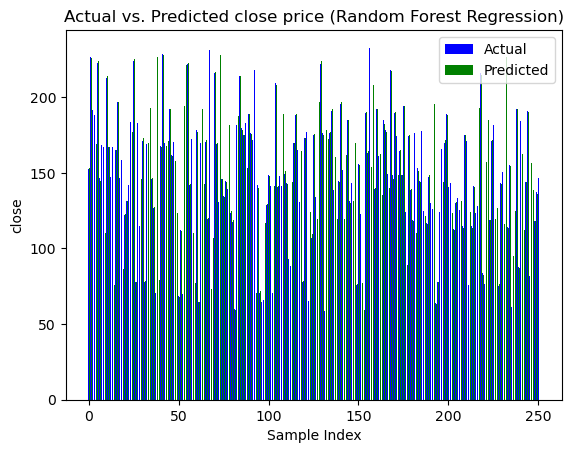

In [7]:
# Create an array of indices for the test set
indices = np.arange(len(y_test))

# Bar plot for actual vs. predicted values
plt.bar(indices, y_test, width=0.4, color='blue', label='Actual')
plt.bar(indices + 0.4, y_pred_random_forest, width=0.4, color='green', label='Predicted')

plt.xlabel('Sample Index')
plt.ylabel('close')
plt.title('Actual vs. Predicted close price (Random Forest Regression)')
plt.legend()
plt.show()


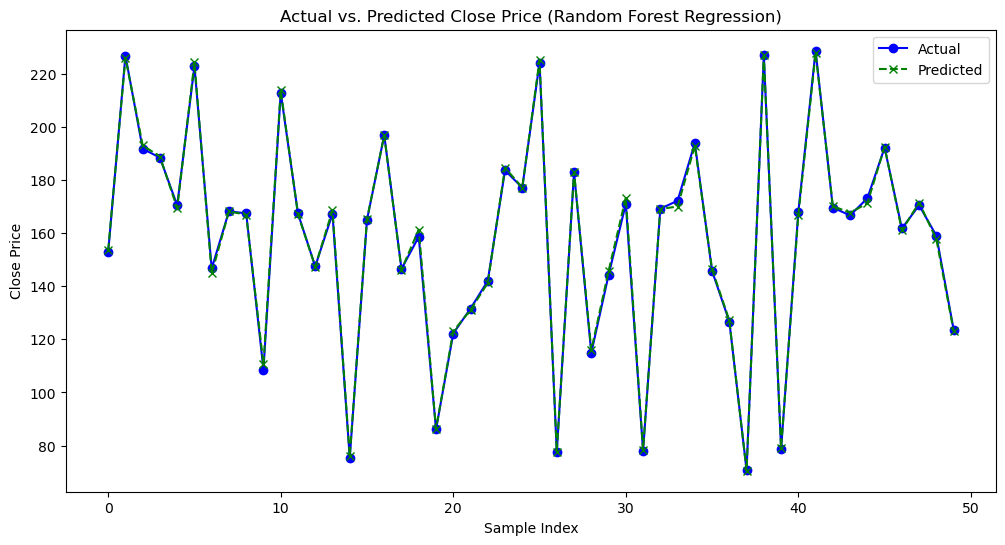

In [8]:
# Select a subset of the test set for clearer visualization (e.g., first 50 points)
subset_indices = np.arange(50)
y_test_subset = y_test.iloc[subset_indices]
y_pred_subset = y_pred_random_forest[:50]

# Plot actual vs predicted values as line plots
plt.figure(figsize=(12, 6))
plt.plot(subset_indices, y_test_subset, marker='o', color='blue', label='Actual')
plt.plot(subset_indices, y_pred_subset, marker='x', color='green', label='Predicted', linestyle='--')

plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price (Random Forest Regression)')
plt.legend()
plt.show()



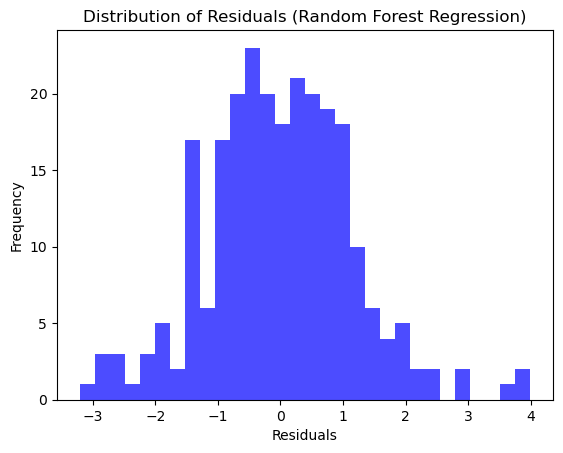

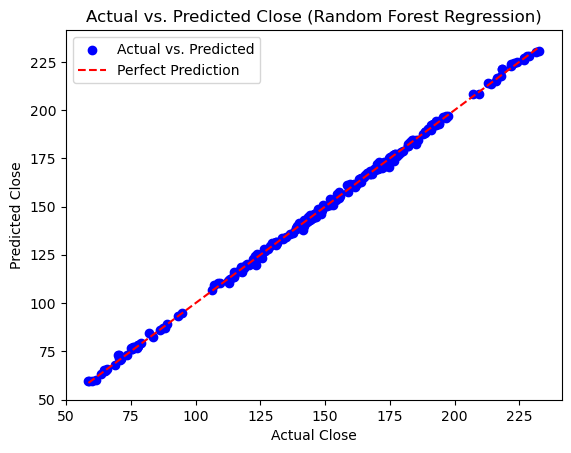

In [9]:

# Calculating residuals
residuals_random_forest = y_test - y_pred_random_forest

# Plotting residuals as a histogram
plt.hist(residuals_random_forest, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Residuals (Random Forest Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# Scatter plot for actual vs. predicted values
plt.scatter(y_test, y_pred_random_forest, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.title('Actual vs. Predicted Close (Random Forest Regression)')
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.legend()
plt.show()